# What Attributes Make Comp-Sci Professionals Most Desirable in the Workforce?

A question which holds relevance to all of us aspiring computer science professionals: 

### Or put another way: How do we get a job? *(a high paying one, too)

This is not a straightforward question with a single answer. But when the consequences of simple decisions like "what programming language should I learn?" and "what major should I be?" are so intense, you can see the need for these insights. I seek to arm those like me who navigate this opaque and trecherous sea with the concrete data they need to make informed decisions. 

This is a question close to our hearts as compsci majors and there are many parties who may wish to know the answer ranging from:
    Educational institutions
    Workplace recruiters
    Current (or prospective) compsci students
    Working professionals


In [46]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

j_data = Table.read_table('Job_Applicant_Data.csv')
j_data.show(10)

Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Gi ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Git;jQuery;L ...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932,C++;Python,2,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,38915,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;TypeScript;D ...,17,1
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319,C++;Python;Docker;Git,4,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern Ireland,68507,Python;Git;PostgreSQL,3,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


### Above we see the data contained in a dataset called "70k+ Job Applicants Data (Human Resource)" ###
(link: https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource)

More background about this dataset is given in the powerpoint portion,
for now lets just get into the python logic starting with the age old debate:
# Higher Education vs. Work Experience  #

{'Avg Ugrad Salary': 67220.991925565482,
 'Avg Masters Salary': 71438.691160133312,
 'Avg PhD Salary': 86150.608895705518,
 'Avg "Other" Salary': 62891.036797934154}

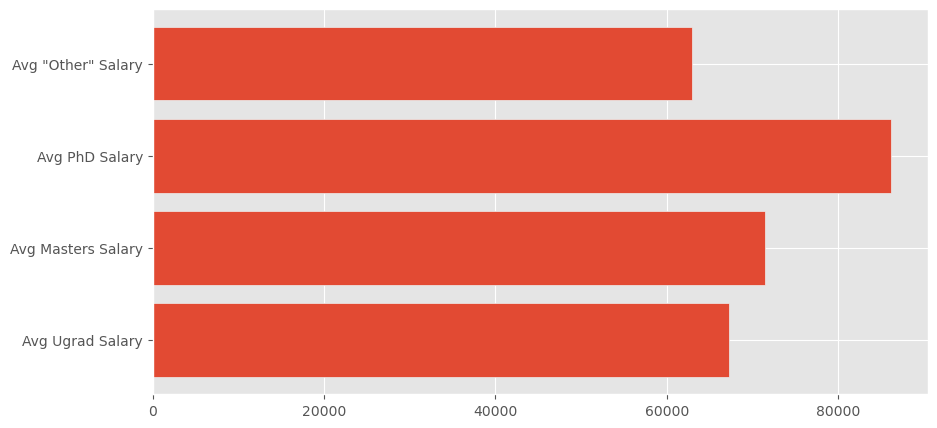

In [15]:
ugrads = j_data.where(j_data['EdLevel'] == 'Undergraduate')['PreviousSalary']
masters = j_data.where(j_data['EdLevel'] == 'Master')['PreviousSalary']
phds = j_data.where(j_data['EdLevel'] == 'PhD')['PreviousSalary']
others = j_data.where(j_data['EdLevel'] == 'Other')['PreviousSalary']

data = {'Avg Ugrad Salary': np.average(ugrads),
        'Avg Masters Salary': np.average(masters),
        'Avg PhD Salary': np.average(phds),
        'Avg "Other" Salary': np.average(others)
       }

labels = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize=(10, 5))

plt.barh(labels, values)

data

Above we witness the power of a degree, yet, perhaps not too powerful after all. Consider a masters degree for example. The costs incurred by losing 2 years of ones working life and the tuition of a 2 year master is high. With these costs in mind, it seems possible that one may be better off just by entering the workforce from their undergraduate degree... or even from highschool!

Below are the earning projections of each choice of degree, making a few generalizing assumptions:
    1. The average salary listed above is what you will earn every year of your career
    2. Your college education was free (the TIME cost of a degree is the only consideration)
    3. You will be hired regardless of credentials and employed continuously

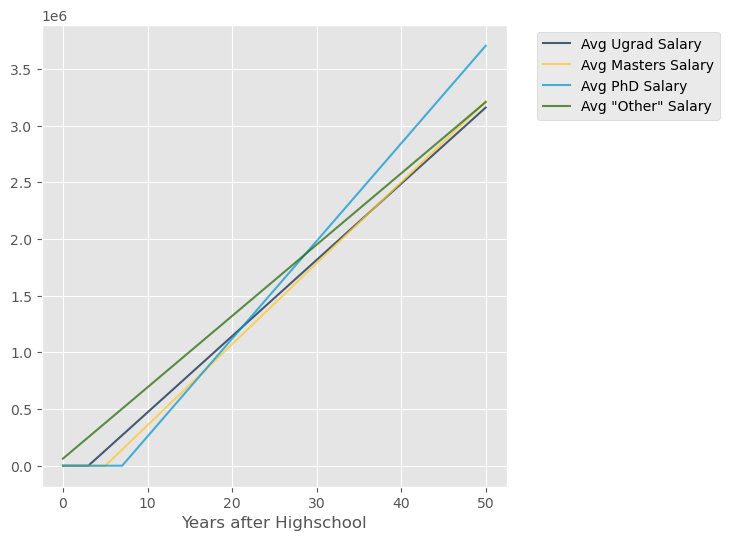

In [45]:
ugrads_list = [0,0,0,0,np.average(ugrads)]
masters_list = [0,0,0,0,0,0,np.average(masters)]
phds_list = [0,0,0,0,0,0,0,0,np.average(phds)]
others_list = [np.average(others)]
years_list = [0]


for i in range(50):
    years_list.append(i+1)
    others_list.append(others_list[-1] + np.average(others))  
    if i > 3:
        ugrads_list.append(ugrads_list[-1] + np.average(ugrads))
    if i > 5:
        masters_list.append(masters_list[-1] + np.average(masters))
    if i > 7:
        phds_list.append(phds_list[-1] + np.average(phds))
    
    
earnings_table = Table().with_columns(
    'Years after Highschool', years_list,
    'Avg Ugrad Salary', ugrads_list,
    'Avg Masters Salary', masters_list,
    'Avg PhD Salary', phds_list,
    'Avg "Other" Salary', others_list,
)

earnings_table.plot('Years after Highschool')

As you can see, it takes a very long time for higher education to pay off. By these projections a Masters degree only pays back the 2 year time cost it takes to earn around the 35th year of ones career. PHD's fair a little better, outpacing both lower credentials by the 20th year, but that is still no small time to wait.

It is important to keep in mind that these slaray projections are not the only variable of imporance when making this decision. Job stability, your likelyhood of being hired, satisfaction and other factors are not accounted for. These variables, if weighed, may give more favor to argument for pursuing education. Then again, there are also pesimistic factors which are also not accounted for. For example this graph presumes that your education is free, if you go into significant debt to pay for upper-level credits you will need to wait even longer than shown here to see a profit.

TL;DR: This is non-comprehensive.

But we can also attack the work experience vs. education credentials argument from another angle. Lets see how earning power changes across time:

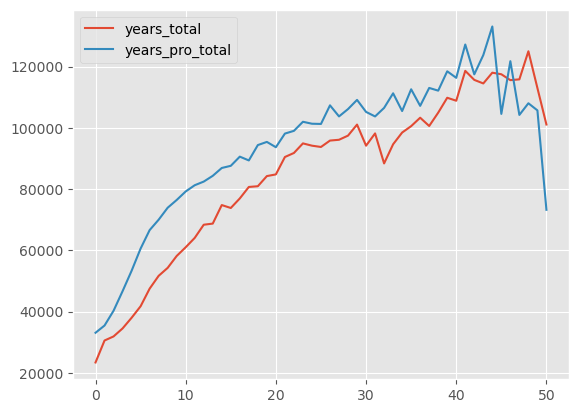

In [12]:
# yearscode_row = 8 # yearscodepro_row = 9 # salary_row = 10
years_dict = {}
years_pro_dict = {} 

years_entries = {}
years_pro_entries = {}

# Populate dicts with proper keys and placeholder values
for i in range(51):
    years_dict.update({i : 60000})
    years_pro_dict.update({i : 60000})
    
    years_entries.update({i : 0}) 
    years_pro_entries.update({i : 0})

# Aggregate sums, keep track of counts
for i in range(j_data.num_rows):
    years_dict.update({j_data[8][i] : years_dict[j_data[8][i]] + j_data[11][i]})
    years_pro_dict.update({j_data[9][i] : years_pro_dict[j_data[9][i]] + j_data[11][i]})
    
    years_entries[j_data[8][i]] += 1
    years_pro_entries[j_data[9][i]] += 1

# Adjust the values in dicts to reflect the average, not sum
for i in range(51):
    years_dict[i] = years_dict[i] / years_entries[i]
    years_pro_dict[i] = years_pro_dict[i] / years_pro_entries[i]


# Vizualize data with a double line plot
plt.plot(years_dict.keys(), years_dict.values(), label='years_total')
plt.plot(years_pro_dict.keys(), years_pro_dict.values(), label='years_pro_total')
plt.legend()

As you can see above, time spent working professionally puts you roughly 5 years ahead of those with the same time spent coding in total. (At least, this is the trend for the first 80% of the graph)

In other words, a person who has been working professionally for 10 years can expect the same pay as someone who has been coding non-professionally for 15 years. The same can be said for 15 years pro and 20 years casual.

This can be seen as another strong argument for entering industry as soon as possible. However, the limitations of this graph should be noted. Moreso than anything else this graph just illustrates that programmers typically join the workforce ~5 years into their education (self or otherwise). Trying to glean a different insight may be ill-advised

# Most Desirable Languages to Master #

Firstly we need to get a list of every possible categorical value contained the column 'HaveWorkedWith', which is responsible for containing the programming languages the employee has worked with.

In [14]:
skill_table = j_data['HaveWorkedWith']

skill_table

array(['C++;Python;Git;PostgreSQL',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Git;Express;React.js;Vue.js;AWS;PostgreSQL',
       'C;C++;Java;Perl;Ruby;Git;Ruby on Rails', ...,
       'HTML/CSS;JavaScript;TypeScript;Docker;Express;Node.js;React.js;AWS;Firebase;Heroku;MongoDB;PostgreSQL',
       'C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn;Angular;ASP.NET;jQuery;React.js;AWS;DynamoDB;Microsoft SQL Server;SQLite',
       'Python;Docker'],
      dtype='<U891')

Uh, oh. They are encoded with a delimeter ";". We will need to extract each unique value as they are not stored seperately. To achive this, we first create a list of entrys for each one in the column. Then, we can programmatically create a new list of skills by splitting the entries across the delimeter ";" and adding each value we find that is not already in the list.

In [15]:
skill_list = []

for i in range(10):
    entry = skill_table[i]
    for index, word in enumerate(entry.split(';')):
        if word not in skill_list:
            skill_list.append(word)
        

print(skill_list)

['C++', 'Python', 'Git', 'PostgreSQL', 'Bash/Shell', 'HTML/CSS', 'JavaScript', 'Node.js', 'SQL', 'TypeScript', 'Express', 'React.js', 'Vue.js', 'AWS', 'C', 'Java', 'Perl', 'Ruby', 'Ruby on Rails', 'PHP', 'jQuery', 'Laravel', 'MySQL', 'Docker', 'Kotlin', 'Kubernetes', 'Angular', 'Spring', 'Heroku', 'DynamoDB', 'Delphi']


Armed with the above list, we can now harvest information from our dataset about information related to what skills each entry has. Lets start with the easiet: How abundant is each skill?

In [16]:
agg_dict = {}
for skill in skill_list:
    agg_dict.update({skill:0})

In [17]:

for i in range(j_data.num_rows):
    row_content = str(j_data[12][i])
    
    
    row_skills = row_content.split(';')
        
    for skill in row_skills:
        if skill in skill_list:
            agg_dict[skill] += 1

print(agg_dict)

{'C++': 12670, 'Python': 31159, 'Git': 35911, 'PostgreSQL': 30102, 'Bash/Shell': 21929, 'HTML/CSS': 40207, 'JavaScript': 49347, 'Node.js': 26043, 'SQL': 38361, 'TypeScript': 27533, 'Express': 13268, 'React.js': 24695, 'Vue.js': 11763, 'AWS': 31590, 'C': 10226, 'Java': 22653, 'Perl': 1804, 'Ruby': 5678, 'Ruby on Rails': 4528, 'PHP': 15409, 'jQuery': 18812, 'Laravel': 5912, 'MySQL': 29490, 'Docker': 40224, 'Kotlin': 6345, 'Kubernetes': 14775, 'Angular': 14398, 'Spring': 5242, 'Heroku': 9860, 'DynamoDB': 6118, 'Delphi': 1881}


<BarContainer object of 31 artists>

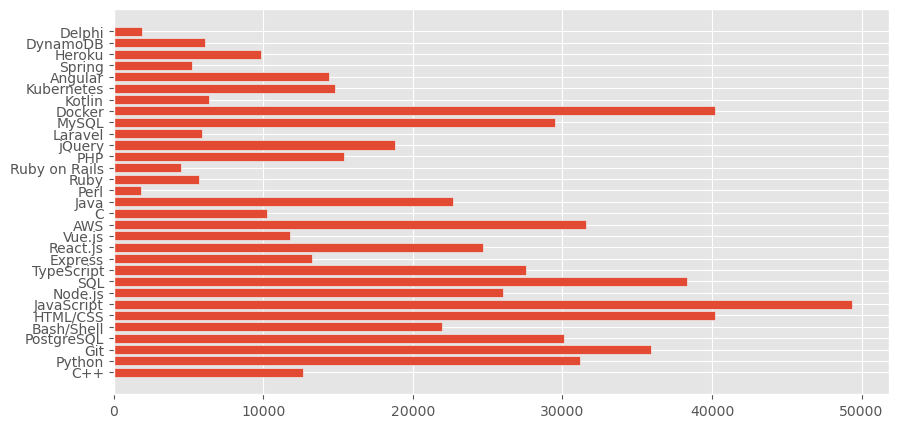

In [18]:
labels2 = list(agg_dict.keys())
values2 = list(agg_dict.values())
fig2 = plt.figure(figsize=(10, 5))


plt.barh(labels2, values2)

### This shows the incidence of tech skills among working professionals. Many insights can be gleaned from this but two that immediatly come to mind are: 

### 1. The number of skills held in industry indicate the DEMAND that these skills likely command

### 2. By that same token, these numbers also indicate the areas of low SUPPLY in industry, where more workers may be desired

### We do not know which is which, perhaps "Perl" and "Delphi" are in short supply or perhaps it is in low demand. To differentiate, lets aggregate the median pay for each of these languages.

In [19]:
sum_dict = {}
for skill in skill_list:
    sum_dict.update({skill:0})

for i in range(j_data.num_rows):
    row_content = str(j_data[12][i])
    row_skills = row_content.split(';') 
    #Same logic as before to split up our language strings
        
        
    for skill in row_skills:
        if skill in skill_list:
#This time we want to add the content of the salary cell, same row
            sum_dict[skill] += j_data[11][i]

        
print(sum_dict)

{'C++': 830736814.0, 'Python': 2186024063.0, 'Git': 2307794360.0, 'PostgreSQL': 2137383393.0, 'Bash/Shell': 1755670971.0, 'HTML/CSS': 2603767323.0, 'JavaScript': 3270537848.0, 'Node.js': 1740646015.0, 'SQL': 2610660079.0, 'TypeScript': 1942930362.0, 'Express': 814598471.0, 'React.js': 1708351740.0, 'Vue.js': 725739043.0, 'AWS': 2431021653.0, 'C': 667242613.0, 'Java': 1469725133.0, 'Perl': 154394743.0, 'Ruby': 488501760.0, 'Ruby on Rails': 383271873.0, 'PHP': 811551307.0, 'jQuery': 1108518529.0, 'Laravel': 260198527.0, 'MySQL': 1712301981.0, 'Docker': 2973488136.0, 'Kotlin': 426363027.0, 'Kubernetes': 1230664440.0, 'Angular': 891444460.0, 'Spring': 317984810.0, 'Heroku': 574347219.0, 'DynamoDB': 531934909.0, 'Delphi': 115521669.0}


In [20]:
final_dict = {}
for skill in skill_list:
    final_dict.update({skill:0})
    
for key in final_dict:
    final_dict[key] = sum_dict[key]/agg_dict[key]
    
print(final_dict)

{'C++': 65567.23078137332, 'Python': 70157.067396257902, 'Git': 64264.274456294726, 'PostgreSQL': 71004.697129758817, 'Bash/Shell': 80061.606594007928, 'HTML/CSS': 64759.05496555326, 'JavaScript': 66276.325774616489, 'Node.js': 66837.38490189302, 'SQL': 68055.057975548087, 'TypeScript': 70567.332364798611, 'Express': 61395.724374434729, 'React.js': 69178.041708847944, 'Vue.js': 61696.764685879454, 'AWS': 76955.41794871795, 'C': 65249.61989047526, 'Java': 64879.933474594975, 'Perl': 85584.669068736141, 'Ruby': 86034.12469179288, 'Ruby on Rails': 84644.848277385157, 'PHP': 52667.357193847754, 'jQuery': 58926.139113331919, 'Laravel': 44011.929465493908, 'MySQL': 58063.817599186164, 'Docker': 73923.233293556084, 'Kotlin': 67196.694562647754, 'Kubernetes': 83293.701522842646, 'Angular': 61914.46450895958, 'Spring': 60660.971003433806, 'Heroku': 58250.225050709938, 'DynamoDB': 86945.882477933963, 'Delphi': 61415.02870813397}


<BarContainer object of 31 artists>

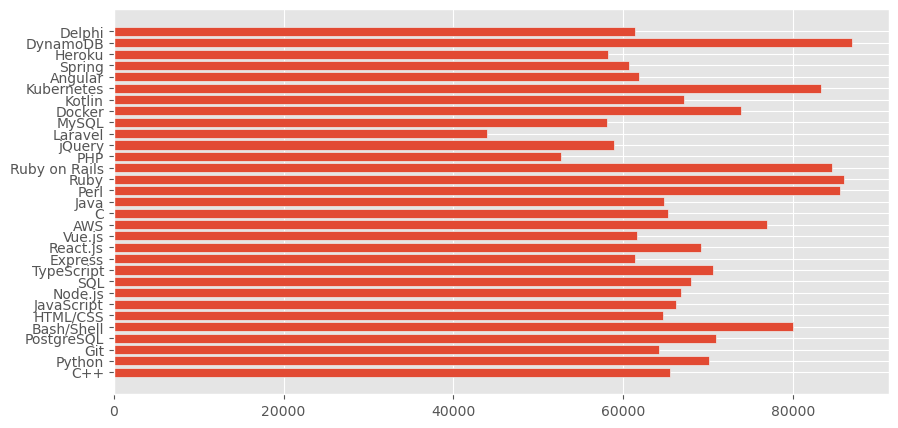

In [21]:
labels3 = list(final_dict.keys())
values3 = list(final_dict.values())
fig3 = plt.figure(figsize=(10, 5))


plt.barh(labels3, values3)

All together now:

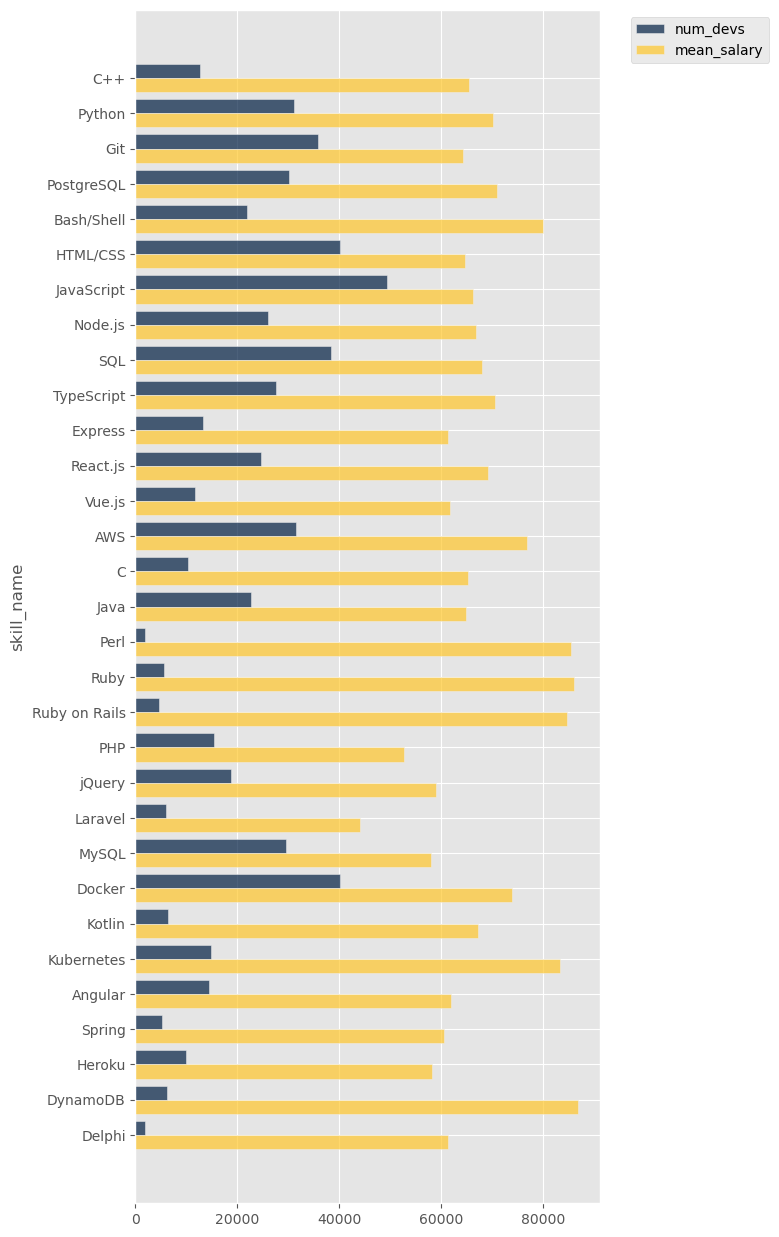

In [22]:
viz_t = Table().with_columns(
    'skill_name', skill_list,
    'num_devs', agg_dict.values(),
    'mean_salary', final_dict.values(),
)

viz_t.barh('skill_name')

### In conclusion:
The blue bars are the number of developers in the dataset for each skill. It stands to represent the relative population of coders per each skill, so that you can help judge which language may have the most/least competition. It is NOT attempting to be an accurate account of the total population of software devs.

The gold bars are the average reported salaries for each skill.

The difference between the gold and blue bars are a good indicator of direction for a budding new developer. A language with low pay (gold) and high saturation (blue) like Javascript and HTML may not be good areas of focus. Conversely, a langauge with high pay and low saturation could indicate an opportunity for new developers interested to learn.